To begin, let's import our data `owls.csv`. The data does not have any titles for the features so the titles *a*, *b*, *c*, *d* and *species* were added.

In [2]:
import pandas

data = pandas.read_csv("../data/owls.csv")

To pick a good algorithm, understanding the data is critical. Let's do a quick scatterplot visualization of the data.

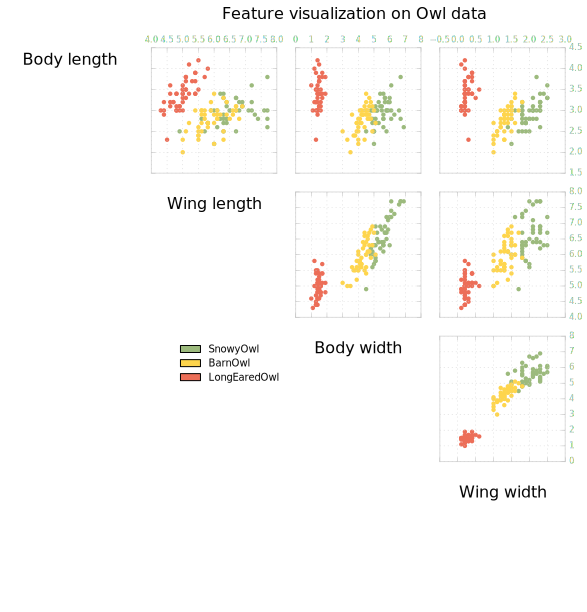

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
from matplotlib.patches import Ellipse
from math import floor

matplotlib.rcParams["font.sans-serif"] = "SFNS Display"
matplotlib.rcParams["svg.fonttype"] = "none"

# Colors of each label
colors = { 'LongEaredOwl': '#EC6E58', 'SnowyOwl': '#9CBA7D', 'BarnOwl': '#FED54D' }
color_map = [colors[species] for species in data["species"]]

handles = []
for color in colors.values():
    e = Ellipse(1, 1, 1, 0)
    e.set_facecolor(color)
    handles.append(e)

fig = matplotlib.pyplot.figure(figsize=(10, 10))
fig.subplots_adjust(wspace=0.15, hspace=0.15)

fig.text(0.79, 0.94, "Feature visualization on Owl data", fontsize=16, horizontalalignment='right')

features = data.columns[:-1]
feature_count = len(features)

for i in range(feature_count**2):
            
    x, y = i % feature_count, int(floor(i / float(feature_count)))
    
    if x < y:
        lh = int(floor(feature_count/2.0))
        if x == (lh - 1) and y == lh:
            ax = fig.add_subplot(feature_count, feature_count, i + 1)
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
            ax.set_frame_on(False)
            ax.legend(handles, colors.keys(), loc=1, fontsize=10, frameon=False)
            
        continue
        
    ax = fig.add_subplot(feature_count, feature_count, i + 1)
    
    if not (y == 0 and x > 0):
        ax.set_xticklabels([])
    else:
        ax.xaxis.set_ticks_position('top')
        
    if not (x == (feature_count - 1)):
        ax.set_yticklabels([])
    else:
        ax.yaxis.set_ticks_position('right')
        
    if x == y:
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        ax.set_frame_on(False)
        label = features[x]
        ax.text(0.5, 0.9, label[0].upper() + label[1:].replace('-', ' '), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=16)
    else:
        ax.scatter(data[features[x]], data[features[y]], c=color_map, edgecolors='none')
        ax.grid(color='#cccccc')
        ax.tick_params(colors='#bbbbbb')
        
        for spine in ax.spines.values():
            spine.set_edgecolor("#dddddd")
    
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(8)
        

fig.savefig('owl-data-scatter.png', dpi=300)